## 1. Imports

In [0]:
import keras
import numpy as np
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications.vgg16 import decode_predictions

## 2. Cargar modelo

In [0]:
model = VGG16(weights='imagenet')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

## 4. Tranfer Learning

Se realiza $\textit{transfer learning}$ luego de la capa "block5_pool (MaxPooling2D)".

In [0]:
model1 = VGG16(weights='imagenet', include_top=True, input_shape = (224, 224, 3))

In [0]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping


#fijar pesos
for layer in model1.layers[0:19]:
    layer.trainable = False
    
# agregando capas

x = model1.layers[19].output
x = Dense(128, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(64, activation="relu")(x)
predictions = Dense(10, activation="softmax")(x)


modelo_final = Model(input = model1.input, output = predictions)
modelo_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999), metrics=["accuracy"])

# Save the model according to the conditions  
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


In [0]:
modelo_final.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
import cv2


from keras.datasets import cifar10
from keras import backend as K
from keras.utils import np_utils

nb_train_samples = 30000 
nb_valid_samples = 5000 
num_classes = 10 


def load_cifar10_data(img_rows, img_cols):

    # Se cargan los sets de cifar10 para entrenamiento y validacion.
    (x_train, y_train_norm), (x_test, y_test_norm) = cifar10.load_data()

    # Reescalado de imagenes
    if K.image_dim_ordering() == 'th':
        x_train = np.array([cv2.resize(img.transpose(1,2,0), (img_rows,img_cols)).transpose(2,0,1) for img in x_train[:nb_train_samples,:,:,:]])
        x_test = np.array([cv2.resize(img.transpose(1,2,0), (img_rows,img_cols)).transpose(2,0,1) for img in x_test[:nb_valid_samples,:,:,:]])
    else:
        x_train = np.array([cv2.resize(img, (img_rows,img_cols)) for img in x_train[:nb_train_samples,:,:,:]])
        x_test = np.array([cv2.resize(img, (img_rows,img_cols)) for img in x_test[:nb_valid_samples,:,:,:]])

    y_train = y_train_norm[:nb_train_samples]
    y_test = y_test_norm[:nb_valid_samples]

    return x_train, y_train, x_test, y_test

x_train, y_train, x_test, y_test = load_cifar10_data(224, 224)




170500096/170498071 [==============================] - 52s 0us/step


In [0]:
# cantidad de elementos por clase
cantidad_clase = np.array([0]*10)
for i in range(0,len(y_train)):
  clase = y_train[i]
  cantidad_clase[clase] = cantidad_clase[clase] + 1
  
clases = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']




    
  



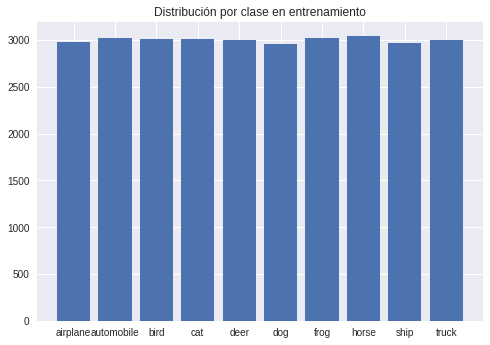

In [0]:
    # this is for plotting purpose
    import matplotlib.pyplot as plt
    plt.bar(clases, cantidad_clase)
    plt.title('Distribución por clase en entrenamiento')
    plt.show()
   

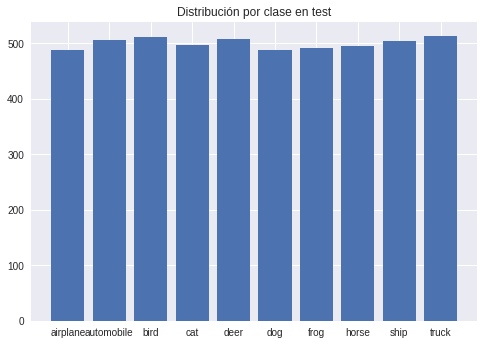

In [0]:
cantidad_clase = np.array([0]*10)
for i in range(0,len(y_test)):
  clase = y_test[i]
  cantidad_clase[clase] = cantidad_clase[clase] + 1
  
plt.bar(clases, cantidad_clase)
plt.title('Distribución por clase en test')
plt.show()
   
   

In [0]:
# transformar a variables categoricas

y_train_cat = np_utils.to_categorical(y_train[:nb_train_samples], num_classes)
y_test_cat = np_utils.to_categorical(y_test[:nb_valid_samples], num_classes)

In [0]:
callbacks = [checkpoint, early]
training = modelo_final.fit(x=x_train, y=y_train_cat, batch_size=50, epochs=14, verbose=1, callbacks=callbacks, validation_split=0.0, validation_data=(x_test,y_test_cat), shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None)

Train on 30000 samples, validate on 5000 samples
Epoch 1/14
30000/30000 [==============================] - 352s 12ms/step - loss: 2.1880 - acc: 0.3476 - val_loss: 1.1392 - val_acc: 0.6238

Epoch 00001: val_acc improved from -inf to 0.62380, saving model to vgg16_1.h5
Epoch 2/14
30000/30000 [==============================] - 345s 12ms/step - loss: 1.5037 - acc: 0.4736 - val_loss: 1.0335 - val_acc: 0.6820

Epoch 00002: val_acc improved from 0.62380 to 0.68200, saving model to vgg16_1.h5
Epoch 3/14
30000/30000 [==============================] - 345s 12ms/step - loss: 1.3876 - acc: 0.5136 - val_loss: 0.8467 - val_acc: 0.7518

Epoch 00003: val_acc improved from 0.68200 to 0.75180, saving model to vgg16_1.h5
Epoch 4/14
30000/30000 [==============================] - 345s 12ms/step - loss: 1.2869 - acc: 0.5509 - val_loss: 0.8475 - val_acc: 0.7404

Epoch 00004: val_acc did not improve from 0.75180
Epoch 5/14
30000/30000 [==============================] - 345s 12ms/step - loss: 1.2239 - acc: 0.5

# 5. Evaluar modelo

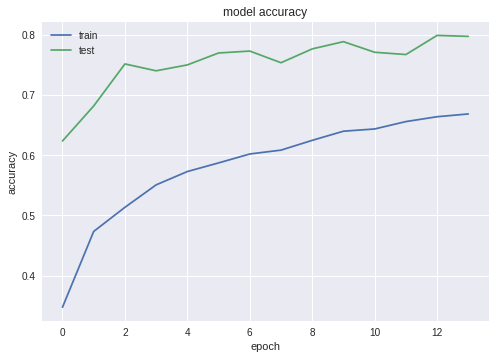

In [0]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(training.history['acc'])
plt.plot(training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

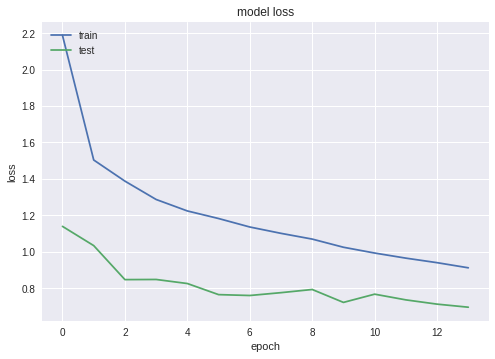

In [0]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix




def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()




Confusion matrix, without normalization
[[435   6   6   3  14   0   1   2  20   1]
 [  9 470   0   2   3   0   0   0   4  17]
 [ 23   5 372  20  69  11   8   4   0   0]
 [  6   8  10 292  54 106   9   9   3   0]
 [ 12   1  20  20 415  11  10  16   2   0]
 [  5   2  10  73  34 353   1   7   1   2]
 [  1   4  15  29  46   3 388   2   2   1]
 [  5   1   2  18  61  18   1 386   2   1]
 [ 53   8   3   2   3   1   1   0 427   6]
 [ 15  41   1   1   0   0   0   1   4 450]]
Normalized confusion matrix
[[0.89 0.01 0.01 0.01 0.03 0.   0.   0.   0.04 0.  ]
 [0.02 0.93 0.   0.   0.01 0.   0.   0.   0.01 0.03]
 [0.04 0.01 0.73 0.04 0.13 0.02 0.02 0.01 0.   0.  ]
 [0.01 0.02 0.02 0.59 0.11 0.21 0.02 0.02 0.01 0.  ]
 [0.02 0.   0.04 0.04 0.82 0.02 0.02 0.03 0.   0.  ]
 [0.01 0.   0.02 0.15 0.07 0.72 0.   0.01 0.   0.  ]
 [0.   0.01 0.03 0.06 0.09 0.01 0.79 0.   0.   0.  ]
 [0.01 0.   0.   0.04 0.12 0.04 0.   0.78 0.   0.  ]
 [0.11 0.02 0.01 0.   0.01 0.   0.   0.   0.85 0.01]
 [0.03 0.08 0.   0.   0.

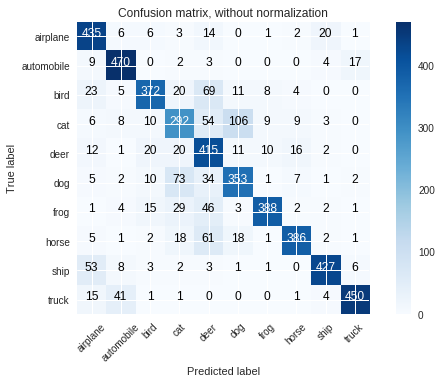

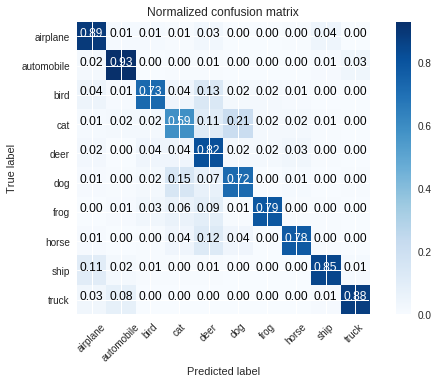

In [0]:

Y_pred = modelo_final.predict(x_test)
y_pred = np.argmax(Y_pred, axis=1)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clases,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clases, normalize=True,
                      title='Normalized confusion matrix')

plt.show()



In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=clases))

             precision    recall  f1-score   support

   airplane       0.77      0.89      0.83       488
 automobile       0.86      0.93      0.89       505
       bird       0.85      0.73      0.78       512
        cat       0.63      0.59      0.61       497
       deer       0.59      0.82      0.69       507
        dog       0.70      0.72      0.71       488
       frog       0.93      0.79      0.85       491
      horse       0.90      0.78      0.84       495
       ship       0.92      0.85      0.88       504
      truck       0.94      0.88      0.91       513

avg / total       0.81      0.80      0.80      5000



In [0]:
# serialize model to JSON
model_json = modelo_final.to_json()
with open("model1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
modelo_final.save_weights("model1.h5")
print("Saved model to disk")

Saved model to disk


## 5. ENTRENAR SOLO ULTIMA CAPA CONVOLUCIONAL



In [0]:
modelo_final.layers[18:]

In [0]:

for layer in modelo_final.layers[0:17]:
    layer.trainable = False
    
for layer in modelo_final.layers[18:]:
    layer.trainable = False
    
modelo_final.layers[17].trainable = True

modelo_final.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [0]:
checkpoint = ModelCheckpoint("weights2.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
callbacks = [checkpoint, early]
training = modelo_final.fit(x=x_train, y=y_train_cat, batch_size=50, epochs=10, verbose=1, callbacks=callbacks, validation_split=0.0, validation_data=(x_test,y_test_cat), shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None)

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Train on 30000 samples, validate on 5000 samples
Epoch 1/10
30000/30000 [==============================] - 344s 11ms/step - loss: 0.8793 - acc: 0.6803 - val_loss: 0.7014 - val_acc: 0.7932

Epoch 00001: val_acc improved from -inf to 0.79320, saving model to weights2.h5
Epoch 2/10
30000/30000 [==============================] - 344s 11ms/step - loss: 0.8648 - acc: 0.6840 - val_loss: 0.7431 - val_acc: 0.7886

Epoch 00002: val_acc did not improve from 0.79320
Epoch 3/10
30000/30000 [==============================] - 345s 11ms/step - loss: 0.8398 - acc: 0.6931 - val_loss: 0.6788 - val_acc: 0.7952

Epoch 00003: val_acc improved from 0.79320 to 0.79520, saving model to weights2.h5
Epoch 4/10
30000/30000 [==============================] - 345s 11ms/step - loss: 0.8024 - acc: 0.7024 - val_loss: 0.6573 - val_acc: 0.7960

Epoch 00004: val_acc improved from 0.79520 to 0.79600, saving model to weights2.h5
Epoch 5/10
30000/30000 [==============================] - 345s 11ms/step - loss: 0.7871 - acc: 

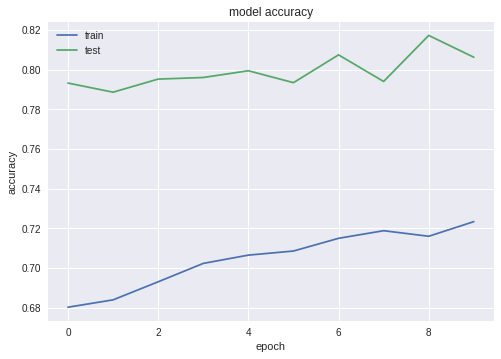

In [0]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(training.history['acc'])
plt.plot(training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



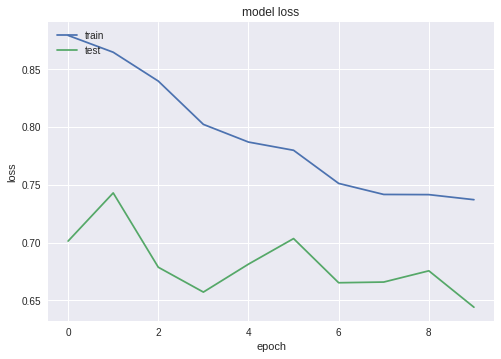

In [0]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
Y_pred = modelo_final.predict(x_test)
y_pred = np.argmax(Y_pred, axis=1)
print(classification_report(y_test, y_pred, target_names=clases))


             precision    recall  f1-score   support

   airplane       0.80      0.89      0.84       488
 automobile       0.94      0.91      0.92       505
       bird       0.89      0.72      0.79       512
        cat       0.49      0.79      0.61       497
       deer       0.71      0.78      0.74       507
        dog       0.86      0.56      0.68       488
       frog       0.88      0.85      0.87       491
      horse       0.96      0.72      0.82       495
       ship       0.91      0.92      0.92       504
      truck       0.89      0.92      0.90       513

avg / total       0.83      0.81      0.81      5000



In [0]:
# serialize model to JSON
model_json = modelo_final.to_json()
with open("model2.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
modelo_final.save_weights("model2.h5")
print("Saved model to disk")

Saved model to disk


## ENTRENAR SOLO SEGUNDA CAPA CONVOLUCIONAL 

In [0]:

for layer in modelo_final.layers[0:16]:
    layer.trainable = False
    
for layer in modelo_final.layers[17:]:
    layer.trainable = False
    
modelo_final.layers[16].trainable = True




In [0]:
for layer in modelo_final.layers:
  print(layer,layer.trainable)
  

<keras.engine.input_layer.InputLayer object at 0x7f53fc0c0f28> False
<keras.layers.convolutional.Conv2D object at 0x7f53b78efeb8> False
<keras.layers.convolutional.Conv2D object at 0x7f53b78ef9b0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f53b7099198> False
<keras.layers.convolutional.Conv2D object at 0x7f53b7099080> False
<keras.layers.convolutional.Conv2D object at 0x7f53b70b53c8> False
<keras.layers.pooling.MaxPooling2D object at 0x7f53b7053128> False
<keras.layers.convolutional.Conv2D object at 0x7f53b7053dd8> False
<keras.layers.convolutional.Conv2D object at 0x7f53b7087160> False
<keras.layers.convolutional.Conv2D object at 0x7f53b7024898> False
<keras.layers.pooling.MaxPooling2D object at 0x7f53b703e198> False
<keras.layers.convolutional.Conv2D object at 0x7f53b703edd8> False
<keras.layers.convolutional.Conv2D object at 0x7f53b6ff4160> False
<keras.layers.convolutional.Conv2D object at 0x7f53b6f91898> False
<keras.layers.pooling.MaxPooling2D object at 0x7f53b6fae198>

In [0]:
checkpoint = ModelCheckpoint("weights2.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
callbacks = [checkpoint, early]
training = modelo_final.fit(x=x_train, y=y_train_cat, batch_size=50, epochs=10, verbose=1, callbacks=callbacks, validation_split=0.0, validation_data=(x_test,y_test_cat), shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None)

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Train on 30000 samples, validate on 5000 samples
Epoch 1/10
30000/30000 [==============================] - 344s 11ms/step - loss: 0.6914 - acc: 0.7371 - val_loss: 0.6546 - val_acc: 0.7952

Epoch 00001: val_acc improved from -inf to 0.79520, saving model to weights2.h5
Epoch 2/10
30000/30000 [==============================] - 344s 11ms/step - loss: 0.6863 - acc: 0.7399 - val_loss: 0.6716 - val_acc: 0.7966

Epoch 00002: val_acc improved from 0.79520 to 0.79660, saving model to weights2.h5
Epoch 3/10
30000/30000 [==============================] - 345s 11ms/step - loss: 0.6914 - acc: 0.7406 - val_loss: 0.6586 - val_acc: 0.8038

Epoch 00003: val_acc improved from 0.79660 to 0.80380, saving model to weights2.h5
Epoch 4/10
30000/30000 [==============================] - 345s 11ms/step - loss: 0.6678 - acc: 0.7447 - val_loss: 0.6752 - val_acc: 0.7982

Epoch 00004: val_acc did not improve from 0.80380
Epoch 5/10
30000/30000 [==============================] - 345s 11ms/step - loss: 0.6723 - acc: 

In [0]:
Y_pred = modelo_final.predict(x_test)
y_pred = np.argmax(Y_pred, axis=1)
print(classification_report(y_test, y_pred, target_names=clases))



             precision    recall  f1-score   support

   airplane       0.78      0.89      0.83       488
 automobile       0.97      0.89      0.92       505
       bird       0.91      0.67      0.77       512
        cat       0.48      0.69      0.57       497
       deer       0.75      0.70      0.72       507
        dog       0.64      0.62      0.63       488
       frog       0.88      0.84      0.86       491
      horse       0.92      0.81      0.86       495
       ship       0.86      0.92      0.89       504
      truck       0.93      0.91      0.92       513

avg / total       0.81      0.79      0.80      5000



In [0]:
# serialize model to JSON
model_json = modelo_final.to_json()
with open("model3.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
modelo_final.save_weights("model3.h5")
print("Saved model to disk")

Saved model to disk


## ENTRENAR 3 CAPA CONVOLUCIONAL


In [0]:

for layer in modelo_final.layers[0:15]:

    layer.trainable = False

    

for layer in modelo_final.layers[16:]:

    layer.trainable = False

    

modelo_final.layers[15].trainable = True


In [0]:
for layer in modelo_final.layers:
  print(layer,layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f53fc0c0f28> False
<keras.layers.convolutional.Conv2D object at 0x7f53b78efeb8> False
<keras.layers.convolutional.Conv2D object at 0x7f53b78ef9b0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f53b7099198> False
<keras.layers.convolutional.Conv2D object at 0x7f53b7099080> False
<keras.layers.convolutional.Conv2D object at 0x7f53b70b53c8> False
<keras.layers.pooling.MaxPooling2D object at 0x7f53b7053128> False
<keras.layers.convolutional.Conv2D object at 0x7f53b7053dd8> False
<keras.layers.convolutional.Conv2D object at 0x7f53b7087160> False
<keras.layers.convolutional.Conv2D object at 0x7f53b7024898> False
<keras.layers.pooling.MaxPooling2D object at 0x7f53b703e198> False
<keras.layers.convolutional.Conv2D object at 0x7f53b703edd8> False
<keras.layers.convolutional.Conv2D object at 0x7f53b6ff4160> False
<keras.layers.convolutional.Conv2D object at 0x7f53b6f91898> False
<keras.layers.pooling.MaxPooling2D object at 0x7f53b6fae198>

In [0]:
checkpoint = ModelCheckpoint("weights3.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
callbacks = [checkpoint, early]
training = modelo_final.fit(x=x_train, y=y_train_cat, batch_size=50, epochs=10, verbose=1, callbacks=callbacks, validation_split=0.0, validation_data=(x_test,y_test_cat), shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None)

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Train on 30000 samples, validate on 5000 samples
Epoch 1/10
30000/30000 [==============================] - 345s 11ms/step - loss: 0.6215 - acc: 0.7668 - val_loss: 0.6819 - val_acc: 0.7962

Epoch 00001: val_acc improved from -inf to 0.79620, saving model to weights3.h5
Epoch 2/10
30000/30000 [==============================] - 345s 11ms/step - loss: 0.6107 - acc: 0.7723 - val_loss: 0.6590 - val_acc: 0.8050

Epoch 00002: val_acc improved from 0.79620 to 0.80500, saving model to weights3.h5
Epoch 3/10
30000/30000 [==============================] - 345s 11ms/step - loss: 0.6076 - acc: 0.7722 - val_loss: 0.7049 - val_acc: 0.7890

Epoch 00003: val_acc did not improve from 0.80500
Epoch 4/10
30000/30000 [==============================] - 345s 11ms/step - loss: 0.6159 - acc: 0.7685 - val_loss: 0.7191 - val_acc: 0.7948

Epoch 00004: val_acc did not improve from 0.80500
Epoch 5/10
30000/30000 [==============================] - 344s 11ms/step - loss: 0.6055 - acc: 0.7734 - val_loss: 0.7129 - val_a

In [0]:
Y_pred = modelo_final.predict(x_test)
y_pred = np.argmax(Y_pred, axis=1)
print(classification_report(y_test, y_pred, target_names=clases))

             precision    recall  f1-score   support

   airplane       0.83      0.87      0.85       488
 automobile       0.97      0.89      0.93       505
       bird       0.81      0.81      0.81       512
        cat       0.52      0.63      0.57       497
       deer       0.73      0.77      0.75       507
        dog       0.64      0.63      0.64       488
       frog       0.91      0.81      0.86       491
      horse       0.94      0.79      0.86       495
       ship       0.90      0.88      0.89       504
      truck       0.88      0.94      0.91       513

avg / total       0.81      0.80      0.81      5000



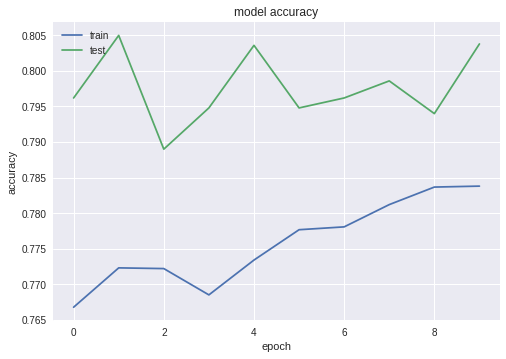

In [0]:
plt.plot(training.history['acc'])
plt.plot(training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
model_json = modelo_final.to_json()
with open("model4.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
modelo_final.save_weights("model4.h5")
print("Saved model to disk")

Saved model to disk


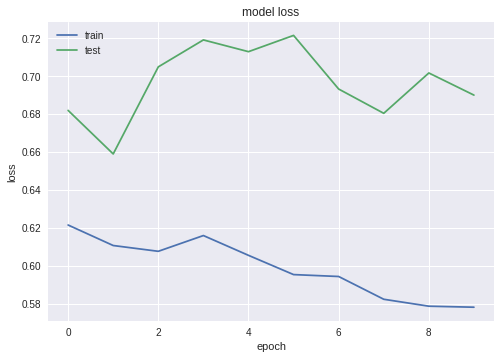

In [0]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## ENTRENAR 3 capas conv

In [0]:

for layer in modelo_final.layers[0:15]:

    layer.trainable = False

    

for layer in modelo_final.layers[16:]:

    layer.trainable = True

    
for layer in modelo_final.layers:
  print(layer,layer.trainable)




<keras.engine.input_layer.InputLayer object at 0x7f53fc0c0f28> False
<keras.layers.convolutional.Conv2D object at 0x7f53b78efeb8> False
<keras.layers.convolutional.Conv2D object at 0x7f53b78ef9b0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f53b7099198> False
<keras.layers.convolutional.Conv2D object at 0x7f53b7099080> False
<keras.layers.convolutional.Conv2D object at 0x7f53b70b53c8> False
<keras.layers.pooling.MaxPooling2D object at 0x7f53b7053128> False
<keras.layers.convolutional.Conv2D object at 0x7f53b7053dd8> False
<keras.layers.convolutional.Conv2D object at 0x7f53b7087160> False
<keras.layers.convolutional.Conv2D object at 0x7f53b7024898> False
<keras.layers.pooling.MaxPooling2D object at 0x7f53b703e198> False
<keras.layers.convolutional.Conv2D object at 0x7f53b703edd8> False
<keras.layers.convolutional.Conv2D object at 0x7f53b6ff4160> False
<keras.layers.convolutional.Conv2D object at 0x7f53b6f91898> False
<keras.layers.pooling.MaxPooling2D object at 0x7f53b6fae198>

In [0]:
training = modelo_final.fit(x=x_train, y=y_train_cat, batch_size=50, epochs=10, verbose=1, callbacks=callbacks, validation_split=0.0, validation_data=(x_test,y_test_cat), shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None)

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Train on 30000 samples, validate on 5000 samples
Epoch 1/10
30000/30000 [==============================] - 345s 12ms/step - loss: 0.5664 - acc: 0.7862 - val_loss: 0.7451 - val_acc: 0.7984

Epoch 00001: val_acc did not improve from 0.80500
Epoch 2/10
30000/30000 [==============================] - 346s 12ms/step - loss: 0.5805 - acc: 0.7836 - val_loss: 0.7194 - val_acc: 0.7988

Epoch 00002: val_acc did not improve from 0.80500
Epoch 3/10
30000/30000 [==============================] - 346s 12ms/step - loss: 0.5669 - acc: 0.7905 - val_loss: 0.7062 - val_acc: 0.7942

Epoch 00003: val_acc did not improve from 0.80500
Epoch 4/10
30000/30000 [==============================] - 347s 12ms/step - loss: 0.5611 - acc: 0.7888 - val_loss: 0.6849 - val_acc: 0.7908

Epoch 00004: val_acc did not improve from 0.80500
Epoch 5/10
30000/30000 [==============================] - 346s 12ms/step - loss: 0.5616 - acc: 0.7893 - val_loss: 0.6829 - val_acc: 0.7894

Epoch 00005: val_acc did not improve from 0.80500
E

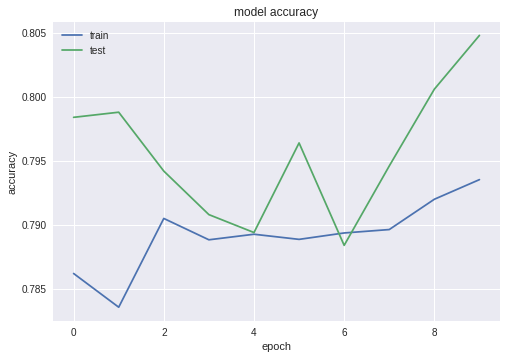

In [0]:
plt.plot(training.history['acc'])
plt.plot(training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
Y_pred = modelo_final.predict(x_test)
y_pred = np.argmax(Y_pred, axis=1)
print(classification_report(y_test, y_pred, target_names=clases))

             precision    recall  f1-score   support

   airplane       0.83      0.86      0.84       488
 automobile       0.96      0.92      0.94       505
       bird       0.84      0.78      0.81       512
        cat       0.58      0.62      0.60       497
       deer       0.65      0.84      0.73       507
        dog       0.62      0.61      0.62       488
       frog       0.94      0.78      0.85       491
      horse       0.95      0.77      0.85       495
       ship       0.87      0.92      0.89       504
      truck       0.92      0.93      0.92       513

avg / total       0.82      0.80      0.81      5000



In [0]:
model_json = modelo_final.to_json()
with open("model5.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
modelo_final.save_weights("model5.h5")
print("Saved model to disk")

Saved model to disk


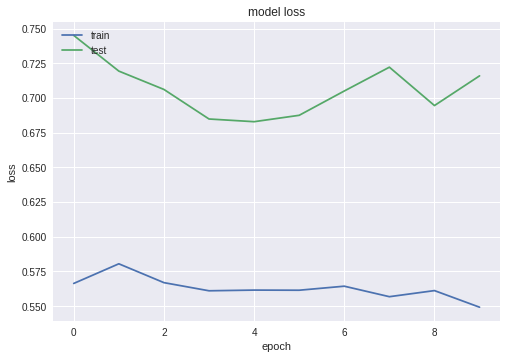

In [0]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()